

### Mini Project: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

Download and unzip dataset from: https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip

In [ ]:
# Download the data
!wget -O MP2_FaceMask_Dataset.zip "https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip"
#-O MP2_FaceMask_Dataset.zip, ensures the file is saved with a recognizable name

--2025-08-19 12:02:32--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589920212 (563M) [application/zip]
Saving to: ‘MP2_FaceMask_Dataset.zip’

MP2_FaceMask_Datase 100%[===================>] 562.59M  12.0MB/s    in 53s     

2025-08-19 12:03:26 (10.6 MB/s) - ‘MP2_FaceMask_Dataset.zip’ saved [589920212/589920212]



In [ ]:
#unzip data
!unzip MP2_FaceMask_Dataset.zip -d face_mask_dataset
#'-d face_mask_dataset' extracts the contents into a directory named 'face_mask_dataset'

Streaming output truncated to the last 5000 lines.
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (473).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (48).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (49).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (50).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (51).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (53).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (54).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (55).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (6).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (67).jpg  
  inflating: face_mask_dataset/MP2_FaceMask_Dataset/train/with_mask/mask (71).jpg  
  inflating: face_mask_da

### Import Required packages

In [ ]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import glob, os
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

## Data Loading and preprocessing


### Analyze the shape of images and distribution of classes

Total images: 6288
Number of unique shapes: 358


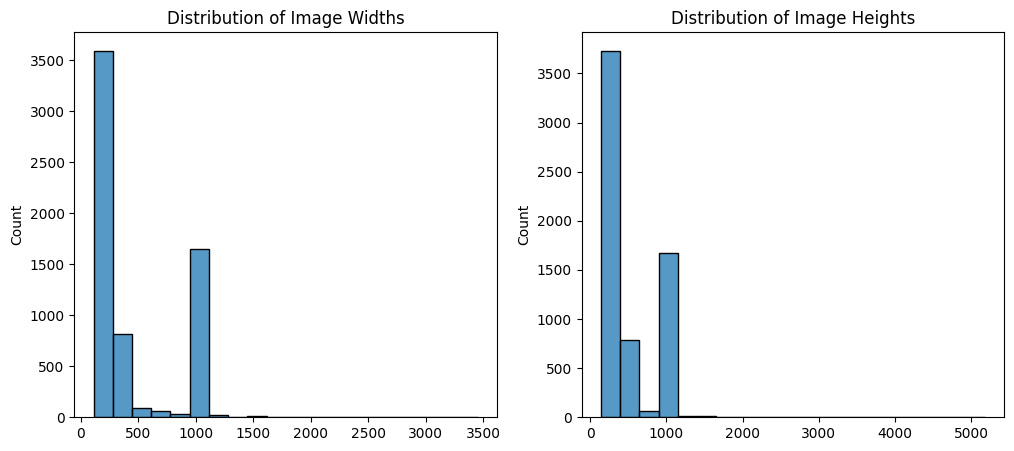

Train distribution: Counter({'without_mask': 2138, 'with_mask': 1597, 'partial_mask': 1294})
Test distribution: Counter({'without_mask': 534, 'with_mask': 402, 'partial_mask': 323})


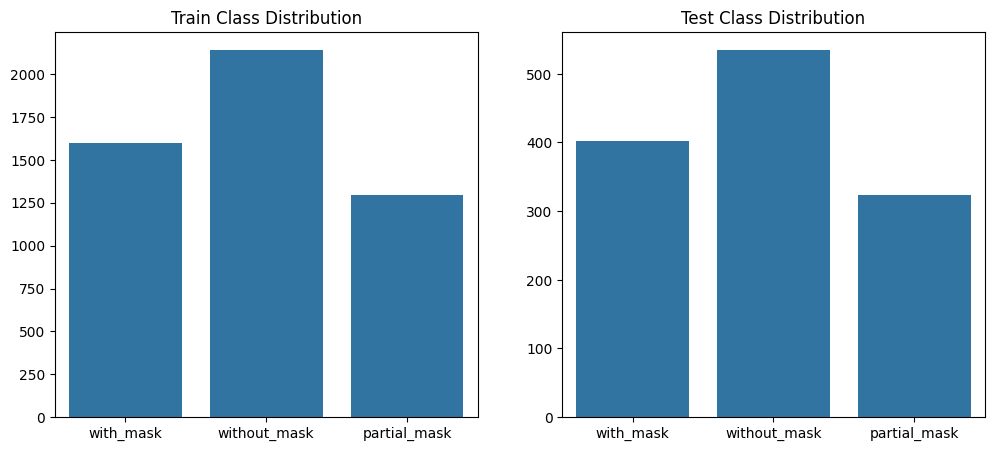

In [ ]:
from PIL import Image         #for image handling
import seaborn as sns         #for better-looking plots
from collections import Counter  #for class frequency counting


base_dir="face_mask_dataset/MP2_FaceMask_Dataset"


#1.Analyzing the image shapes
image_shapes=[]  #This is a list to store image dimensions

#Looping through all folders and files inside base_dir
for root, dirs, files in os.walk(base_dir):
    for fn in files:
        #Ensuring only images are considered
        if fn.lower().endswith(('.png', '.jpg', '.jpeg')):
            path=os.path.join(root, fn)
            try:
                # Open the image
                img=Image.open(path)
                #Save the image shape,(width, height)
                image_shapes.append(img.size)
            except:
                #If any corrupted image is found, skip it
                continue

#Converting (width, height) to (height, width) for consistency
image_shapes=[(h, w) for (w, h) in image_shapes]


print("Total images:",len(image_shapes))
print("Number of unique shapes:",len(set(image_shapes)))





#2.Plot Distribution of Image Dimensions
#Separate the heights and widths for plotting
heights=[h for h, w in image_shapes]
widths=[w for h, w in image_shapes]

plt.figure(figsize=(12,5))

#Plot the width distribution
plt.subplot(1,2,1)
sns.histplot(widths, bins=20, kde=False)
plt.title("Distribution of Image Widths")

#Plot the height distribution
plt.subplot(1,2,2)
sns.histplot(heights, bins=20, kde=False)
plt.title("Distribution of Image Heights")

plt.show()




#3.Function to Get Class Distribution
def get_class_distribution(path):
    """
    Basically we loop through a dataset path (train or test)
    and count how many images belong to each class.
    """
    classes=[]
    for root, dirs, files in os.walk(path):
        for fn in files:
            if fn.lower().endswith(('.png', '.jpg', '.jpeg')):
                #The class name is nothing but the folder name
                class_name=os.path.basename(root)
                classes.append(class_name)
    return Counter(classes)


#Getting and train and test distributions
train_dist =get_class_distribution(os.path.join(base_dir, "train"))
test_dist =get_class_distribution(os.path.join(base_dir, "test"))

print("Train distribution:", train_dist)
print("Test distribution:", test_dist)





#4.Plotting Train vs Test Class Distribution
fig, axs=plt.subplots(1, 2, figsize=(12,5))

#plotting barplot
sns.barplot(x=list(train_dist.keys()), y=list(train_dist.values()), ax=axs[0])
axs[0].set_title("Train Class Distribution")
sns.barplot(x=list(test_dist.keys()), y=list(test_dist.values()), ax=axs[1])
axs[1].set_title("Test Class Distribution")

plt.show()








### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.



In [ ]:
TRAINING_DIR = os.path.join(base_dir, "train")
VALIDATION_DIR = os.path.join(base_dir, "test")

In [ ]:
#Creating the ImageDataGenerators

#train_datagen: Basically applies data augmentation (rotations, flips, etc.)
#Helps increase data diversity and prevent overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,        #normalise the pixel values (0–255 to 0–1)
    rotation_range=20,     #random rotation
    width_shift_range=0.25, #random horizontal shift
    height_shift_range=0.25,#random vertical shift
    shear_range=0.2,       #random shear
    zoom_range=0.15,        #random zoom
    horizontal_flip=True,  #flip images horizontally
    fill_mode='nearest'    #fill pixels after transformation, based on the closest pixels
)

#Validation generator: only rescaling
#No augmentation, as this is basically testing the model at each step
val_datagen = ImageDataGenerator(rescale=1./255)



#Flow from directory:-
#We use flow_from_directory because:
  #1.Our dataset is organized into folders (train/validation with subfolders for each class).
  #2.Keras can automatically label images based on the folder names (partial_mask, with_mask, without_mask).
  #3.It generates batches of images + labels on the fly, which is memory-efficient for large datasets.

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,               #Path to training dataset
    target_size=(224,224),      #Resize all images to 224x224 pixels (required by ResNet)
    batch_size=32,              #Number of images processed in one iteration.
    #Instead of loading all images at once (which could crash memory), we train in mini-batches of 32 images
    class_mode='categorical'    #Because we have 3 categories (multi-class classification).
)

validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DIR,             #Path to validation dataset
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)


Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.


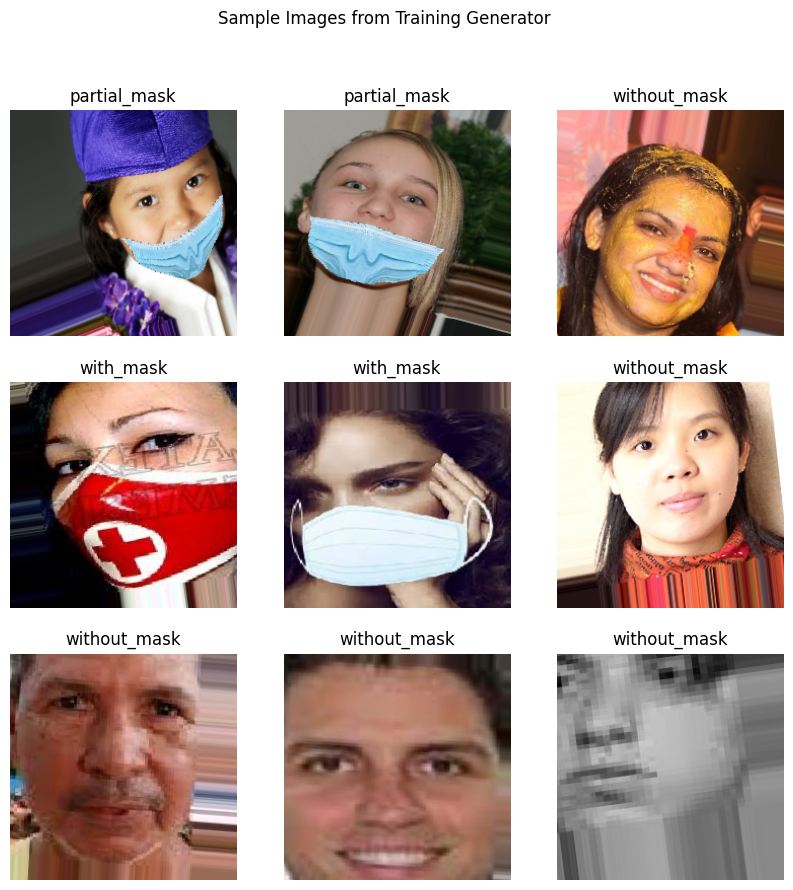

In [ ]:
#Fetch one batch of images and labels from the generator
sample_images, sample_labels = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):  #For first 9 images from dataset
    #Each 'sample_labels[i]' is one-hot encoded because class_mode='categorical'
    #Example: [1,0,0]=class 0, [0,1,0]=class 1, [0,0,1]=class 2

    #np.argmax() converts one-hot vector into the actual class index (0,1,2)
    class_index = np.argmax(sample_labels[i])

    #Map the class index back to the original class name(folder name)
    class_name = list(train_generator.class_indices.keys())[class_index]

    plt.subplot(3,3,i+1)
    plt.imshow(sample_images[i])  #display the image
    plt.title(class_name)         #show class name instead of index
    plt.axis("off")

plt.suptitle("Sample Images from Training Generator")
plt.show()


## Build the CNN model using Keras




**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

In [ ]:
#CNN model
model=Sequential([
    #1st Convolutional Layer: 32 filters of size 3x3
    #Input: 224x224 RGB images (3 channels)
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)), #ReLU activation to introduce non-linearity.
    MaxPooling2D(2,2),   #Reducing the size(Downsamples) by taking max in each 2x2 block
    #Helps reduce computation and focus on important features.
    #2nd Convolutional Layer: 64 filters
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    #3rd Convolutional Layer: 128 filters
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    #Flatten the 2D feature maps into 1D for the fully connected layers
    Flatten(),

    #Fully Connected Dense Layer with 128 neurons
    Dense(128, activation='relu'),
    Dropout(0.5),  #Randomly drops 50% neurons, prevents overfitting

    #Output Layer: 3 neurons (since we have 3 classes)
    #Softmax ensures outputs are probabilities
    Dense(3, activation='softmax')
])

#Compile model with Adam optimizer(Adaptive optimiser, a good default choice), categorical crossentropy loss
#and measure accuracy as the performance metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train model for 5 epochs using training generator
#Validation generator checks performance on unseen data
history=model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 88s 517ms/step - accuracy: 0.6245 - loss: 0.9006 - val_accuracy: 0.8594 - val_loss: 0.3829
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 79s 497ms/step - accuracy: 0.8503 - loss: 0.4317 - val_accuracy: 0.9357 - val_loss: 0.2125
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 79s 502ms/step - accuracy: 0.8941 - loss: 0.2983 - val_accuracy: 0.9523 - val_loss: 0.1494
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 79s 497ms/step - accuracy: 0.9125 - loss: 0.2492 - val_accuracy: 0.9651 - val_loss: 0.1341
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 73s 464ms/step - accuracy: 0.9120 - loss: 0.2500 - val_accuracy: 0.9269 - val_loss: 0.1965


## Transfer learning

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

#ResNet50 Base Model
#'include_top=False': removes the default 1000-class classification head
#'weights="imagenet"': use pretrained ImageNet weights
resnet_base=ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))


#Freeze most layers, then unfreeze last 5 layers
for layer in resnet_base.layers[:-5]:
    layer.trainable = False
for layer in resnet_base.layers[-5:]:
    layer.trainable = True


#Adding custom layers on top of ResNet50
model_res=Sequential([
    resnet_base,                        #Pretrained ResNet50 base
    GlobalAveragePooling2D(),           #Replace Flatten with GAP (works better for CNNs)
    Dense(256, activation='relu'),      #Fully connected layer
    BatchNormalization(),               #Helps with training stability
    Dropout(0.5),                       #Dropout to reduce overfitting
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')      #Output layer for 3 classes
])



#Compiling the model
model_res.compile(
    optimizer=Adam(learning_rate=1e-4),   #Small LR because we’re fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model_res.fit(
    train_generator,                      #Training data from ImageDataGenerator
    epochs=25,                            #Number of epochs (can increase if needed)
    validation_data=validation_generator  #Validation data
)


Epoch 1/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 117s 637ms/step - accuracy: 0.5193 - loss: 1.2844 - val_accuracy: 0.4019 - val_loss: 1.0296
Epoch 2/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 83s 525ms/step - accuracy: 0.6302 - loss: 0.9708 - val_accuracy: 0.4551 - val_loss: 1.1944
Epoch 3/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 80s 503ms/step - accuracy: 0.6586 - loss: 0.9147 - val_accuracy: 0.5290 - val_loss: 1.4251
Epoch 4/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 81s 498ms/step - accuracy: 0.6744 - loss: 0.8560 - val_accuracy: 0.6577 - val_loss: 0.8778
Epoch 5/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 77s 487ms/step - accuracy: 0.6911 - loss: 0.7839 - val_accuracy: 0.6632 - val_loss: 1.6445
Epoch 6/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 84s 533ms/step - accuracy: 0.7114 - loss: 0.7665 - val_accuracy: 0.6767 - val_loss: 1.0709
Epoch 7/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 78s 494ms/step - accuracy: 0.7253 - loss: 0.7164 - val_accuracy: 0.6156 - val_loss: 1.0384
Epoch 8/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - accuracy: 0.7152 - loss: 

### Capture the live image using the below code cell and predict

<IPython.core.display.Javascript object>

Saved to photo.jpg


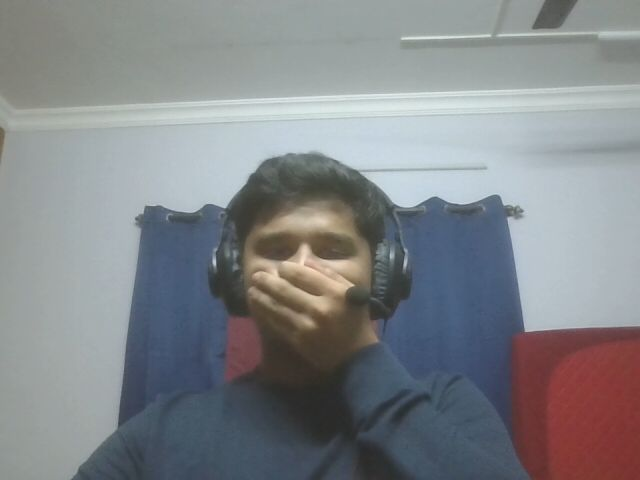

In [ ]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      //Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      //Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Class index: 2
Predicted Class: without_mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Class index: 2
Predicted Class: without_mask


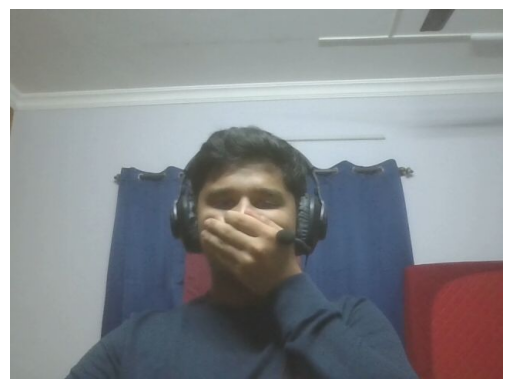

In [ ]:
import numpy as np
import PIL
from tensorflow.keras.preprocessing import image

#Load and display the captured image
img=PIL.Image.open("photo.jpg")
plt.imshow(img)
plt.axis("off")

#Resize to match training size (128x128)
img=img.resize((224, 224))

#Convert to array and normalize
img_array=image.img_to_array(img) / 255.0

#Expand to 4D (batch of 1)
img_array=np.expand_dims(img_array, axis=0)

#Predict
pred = model.predict(img_array)

#Get class index
predicted_class = np.argmax(pred, axis=1)[0]
print("Predicted Class index:",predicted_class)
#Map index to class name
class_names = ["partial_mask","with_mask","without_mask"]
print("Predicted Class:", class_names[predicted_class])



#Predict
pred = model_res.predict(img_array)

#Get class index
predicted_class = np.argmax(pred, axis=1)[0]
print("Predicted Class index:",predicted_class)
#Map index to class name
class_names = ["partial_mask","with_mask","without_mask"]
print("Predicted Class:", class_names[predicted_class])


### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- Discuss the confusion matrix in terms of the misclassifications



**Q1. Compare the accuracies for the Pre-trained (ResNet50) vs CNN models.**

* **CNN (from scratch):** Started higher (≈66%) and quickly reached **90% accuracy in 4–5 epochs**.
* **ResNet50 (pre-trained):** Started lower (≈54%) and fluctuated in validation accuracy, stabilizing slower.

---

**Q2. What process was followed to tune the hyperparameters?**

* Used **Adam optimizer** with small learning rate (`0.0001`).
* Applied **Batch Normalization** and **Dropout** (0.5) to reduce overfitting.
* Fine-tuned last **10 layers of ResNet50** while keeping others frozen.

---

**Q3. Which model detects mask/no mask/partial mask more accurately with live pictures?**

* **CNN model**: Performs better and correctly classifies mask, no mask, and partial mask in live tests.
* **ResNet50 model**: Often biased toward predicting “partial mask.”

---

**Q4. Discuss the confusion matrix in terms of misclassifications.**

* **CNN:** Few misclassifications; main errors when face is **partially covered (e.g., hands mistaken for mask)**.
* **ResNet50:** Higher misclassifications; tends to **confuse all classes with partial mask**.




